In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree

import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
data = pd.read_csv('BTCUSDT_Binance_futures_data_day.csv',skiprows=1)

In [3]:
data1=data.copy()

In [4]:
data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1663200000000,2022-09-15 00:00:00,BTC/USDT,20217.00,20256.50,20180.00,20252.00,6652.417,1.344981e+08,40077
1,1663113600000,2022-09-14 00:00:00,BTC/USDT,20162.60,20528.50,19600.00,20217.00,661802.597,1.333808e+10,4375732
2,1663027200000,2022-09-13 00:00:00,BTC/USDT,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217
3,1662940800000,2022-09-12 00:00:00,BTC/USDT,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349
4,1662854400000,2022-09-11 00:00:00,BTC/USDT,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590
...,...,...,...,...,...,...,...,...,...,...
1099,1568246400000,2019-09-12 00:00:00,BTC/USDT,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060
1100,1568160000000,2019-09-11 00:00:00,BTC/USDT,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811
1101,1568073600000,2019-09-10 00:00:00,BTC/USDT,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089
1102,1567987200000,2019-09-09 00:00:00,BTC/USDT,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296


In [5]:
data1

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1663200000000,2022-09-15 00:00:00,BTC/USDT,20217.00,20256.50,20180.00,20252.00,6652.417,1.344981e+08,40077
1,1663113600000,2022-09-14 00:00:00,BTC/USDT,20162.60,20528.50,19600.00,20217.00,661802.597,1.333808e+10,4375732
2,1663027200000,2022-09-13 00:00:00,BTC/USDT,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217
3,1662940800000,2022-09-12 00:00:00,BTC/USDT,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349
4,1662854400000,2022-09-11 00:00:00,BTC/USDT,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590
...,...,...,...,...,...,...,...,...,...,...
1099,1568246400000,2019-09-12 00:00:00,BTC/USDT,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060
1100,1568160000000,2019-09-11 00:00:00,BTC/USDT,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811
1101,1568073600000,2019-09-10 00:00:00,BTC/USDT,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089
1102,1567987200000,2019-09-09 00:00:00,BTC/USDT,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296


In [6]:
i=1
data['y1'] = data[['close']].shift(i)

In [7]:
data['y1'].fillna(method='bfill', inplace=True)

In [8]:
data.date = pd.to_datetime(data.date)

In [9]:
data.set_index('date',inplace= True)

In [10]:
data = data.asfreq('d')

In [11]:
data.drop(columns=['unix','symbol'], inplace=True)

In [12]:
data

,open,high,low,close,Volume BTC,Volume USDT,tradecount,y1
date,,,,,,,,
2019-09-08,10000.00,10412.65,10000.00,10391.63,3096.291,3.209628e+07,3754,10307.00
2019-09-09,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296,10102.02
2019-09-10,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089,10159.55
2019-09-11,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811,10415.13
2019-09-12,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060,10341.34
...,...,...,...,...,...,...,...,...
2022-09-11,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590,22386.00
2022-09-12,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349,20162.50
2022-09-13,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217,20217.00


In [13]:
data['ma10'] = data['close'].rolling(window=10, min_periods=1, center=False).mean()
data['ma20'] = data['close'].rolling(window=20, min_periods=1, center=False).mean()
data['ma15'] = data['close'].rolling(window=15, min_periods=1, center=False).mean()

data['ma10_ma20'] = data['ma10'] / data['ma20']
data['ma10_ma15'] = data['ma10'] / data['ma15']
data['ma15_ma20'] = data['ma15'] / data['ma20']

In [14]:
data['ma10_ma20_diff'] = data['ma10_ma20'] - data['ma10_ma20'].shift(-1)
data = data.sort_index()
data['ma10_ma15_diff'] = data['ma10_ma15'] - data['ma10_ma15'].shift(-1) 
data = data.sort_index()
data['ma15_ma20_diff'] = data['ma15_ma20'] - data['ma15_ma20'].shift(-1)
data = data.sort_index()
data['close_diff'] = data['close'] - data['close'].shift(-1)
data = data.sort_index()
data['open_diff'] = data['open'] - data['open'].shift(-1)
data = data.sort_index()
data['high_diff'] = data['high'] - data['high'].shift(-1)
data = data.sort_index()
data['low_diff'] = data['low'] - data['low'].shift(-1)
data = data.sort_index()
data['volumebtc_diff'] = data['Volume BTC'] - data['Volume BTC'].shift(-1)
data = data.sort_index()
data['volumeusdt_diff'] = data['Volume USDT'] - data['Volume USDT'].shift(-1)
data = data.sort_index()
data['tradecount_diff'] = data['tradecount'] - data['tradecount'].shift(-1)
data = data.sort_index()

data['ma10_ma20_difff'] = data['ma10_ma20'] - data['ma10_ma20'].shift(-2)
data = data.sort_index()
data['ma10_ma15_difff'] = data['ma10_ma15'] - data['ma10_ma15'].shift(-2) 
data = data.sort_index()
data['ma15_ma20_difff'] = data['ma15_ma20'] - data['ma15_ma20'].shift(-2)
data = data.sort_index()
data['close_difff'] = data['close'] - data['close'].shift(-2)
data = data.sort_index()
data['open_difff'] = data['open'] - data['open'].shift(-2)
data = data.sort_index()
data['high_difff'] = data['high'] - data['high'].shift(-2)
data = data.sort_index()
data['low_difff'] = data['low'] - data['low'].shift(-2)
data = data.sort_index()
data['volumebtc_difff'] = data['Volume BTC'] - data['Volume BTC'].shift(-2)
data = data.sort_index()
data['volumeusdt_difff'] = data['Volume USDT'] - data['Volume USDT'].shift(-2)
data = data.sort_index()
data['tradecount_difff'] = data['tradecount'] - data['tradecount'].shift(-2)
data = data.sort_index()

data[['close','close_diff','close_difff']].head(4)

,close,close_diff,close_difff
date,,,
2019-09-08,10391.63,84.63,289.61
2019-09-09,10307.00,204.98,147.45
2019-09-10,10102.02,-57.53,-313.11
2019-09-11,10159.55,-255.58,-181.79


In [15]:
lag = 3
data['mx'] = data['high'].rolling(lag).max()
data['mn'] = data['low'].rolling(lag).min()
data['diff_high'] = data['mx'] - data['close']
data['diff_low'] = data['close'] - data['mn']

print(data.head(10))

                open      high       low     close  Volume BTC   Volume USDT  \
date                                                                           
2019-09-08  10000.00  10412.65  10000.00  10391.63    3096.291  3.209628e+07   
2019-09-09  10316.62  10475.54  10077.22  10307.00   14824.373  1.524472e+08   
2019-09-10  10307.00  10382.97   9940.87  10102.02    9068.955  9.271765e+07   
2019-09-11  10094.27  10293.11   9884.31  10159.55   10897.922  1.097862e+08   
2019-09-12  10163.06  10450.13  10042.12  10415.13   15609.634  1.594942e+08   
2019-09-13  10414.96  10440.55  10153.51  10341.34   19252.721  1.982054e+08   
2019-09-14  10343.01  10419.97  10222.77  10332.25   20656.624  2.132705e+08   
2019-09-15  10333.47  10359.20  10024.81  10302.22   20536.255  2.115125e+08   
2019-09-16  10302.00  10353.81  10080.70  10249.27   20185.637  2.067675e+08   
2019-09-17  10257.30  10270.63  10136.77  10186.52   22519.607  2.299115e+08   

            tradecount        y1       

In [16]:
data = data.dropna(axis=0)

In [17]:
data1

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1663200000000,2022-09-15 00:00:00,BTC/USDT,20217.00,20256.50,20180.00,20252.00,6652.417,1.344981e+08,40077
1,1663113600000,2022-09-14 00:00:00,BTC/USDT,20162.60,20528.50,19600.00,20217.00,661802.597,1.333808e+10,4375732
2,1663027200000,2022-09-13 00:00:00,BTC/USDT,22386.00,22850.00,19840.00,20162.50,1218769.927,2.605512e+10,7515217
3,1662940800000,2022-09-12 00:00:00,BTC/USDT,21820.30,22474.00,21540.00,22386.00,818601.932,1.810046e+10,5450349
4,1662854400000,2022-09-11 00:00:00,BTC/USDT,21639.50,21883.40,21336.00,21820.30,420979.326,9.093590e+09,2862590
...,...,...,...,...,...,...,...,...,...,...
1099,1568246400000,2019-09-12 00:00:00,BTC/USDT,10163.06,10450.13,10042.12,10415.13,15609.634,1.594942e+08,20060
1100,1568160000000,2019-09-11 00:00:00,BTC/USDT,10094.27,10293.11,9884.31,10159.55,10897.922,1.097862e+08,13811
1101,1568073600000,2019-09-10 00:00:00,BTC/USDT,10307.00,10382.97,9940.87,10102.02,9068.955,9.271765e+07,10089
1102,1567987200000,2019-09-09 00:00:00,BTC/USDT,10316.62,10475.54,10077.22,10307.00,14824.373,1.524472e+08,11296


In [18]:
data = data.iloc[33:] # Because of moving averages and MACD line
data = data[:-1]      # Because of shifting close price

data.index = range(len(data))

In [19]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(data.shape[0] * (1-test_size))


In [20]:
test_split_idx

906

In [34]:
train_df  = data.loc[:test_split_idx]
test_df   = data.loc[test_split_idx+1:]

fig = go.Figure()
fig.add_trace(go.Scatter(x=data1.date, y=train_df.close, name='Training'))
fig.add_trace(go.Scatter(x=data1.date,  y=test_df.close,  name='Test'))
fig.show()

In [22]:
y_train = train_df['y1'].copy()
X_train = train_df.drop(['y1'], 1)

y_test  = test_df['y1'].copy()
X_test  = test_df.drop(['y1'], 1)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   open              907 non-null    float64
 1   high              907 non-null    float64
 2   low               907 non-null    float64
 3   close             907 non-null    float64
 4   Volume BTC        907 non-null    float64
 5   Volume USDT       907 non-null    float64
 6   tradecount        907 non-null    int64  
 7   ma10              907 non-null    float64
 8   ma20              907 non-null    float64
 9   ma15              907 non-null    float64
 10  ma10_ma20         907 non-null    float64
 11  ma10_ma15         907 non-null    float64
 12  ma15_ma20         907 non-null    float64
 13  ma10_ma20_diff    907 non-null    float64
 14  ma10_ma15_diff    907 non-null    float64
 15  ma15_ma20_diff    907 non-null    float64
 16  close_diff        907 non-null    float64
 1

C:\Users\lenovo\AppData\Local\Temp/ipykernel_13820/827820338.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\lenovo\AppData\Local\Temp/ipykernel_13820/827820338.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

eval_set = [(X_train, y_train)]
model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False)
clf = GridSearchCV(model, parameters)

clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

[21:34:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:34:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:34:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:34:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:34:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:35:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:35:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:36:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:36:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:36:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:36:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:37:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:37:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:37:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:37:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:37:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:38:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:38:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:38:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:39:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:39:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:39:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:40:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:40:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:41:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:41:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:41:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:42:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:42:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:42:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:42:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:42:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:43:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:43:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:43:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:43:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:44:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:44:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:44:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:45:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:45:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:45:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:46:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:46:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:46:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:46:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:46:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:47:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:47:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:47:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:47:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:48:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:48:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:48:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:49:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:49:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:49:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:50:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:50:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:50:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:50:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

[21:50:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Paramete

[21:51:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "eval_set", "verbose" } are not used.

Best params: {'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400, 'random_state': 42}
Best validation score = 0.9058834637250868


In [25]:
model = xgb.XGBRegressor(**clf.best_params_, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

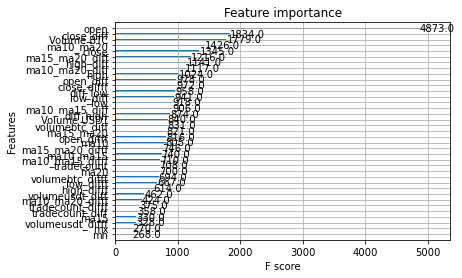

In [26]:
plot_importance(model);

In [27]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [42229.2 42727.7 42140.4 39505.6 40060.7]
y_pred = [42325.31  42158.83  42215.54  39661.082 39439.46 ]


In [28]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 2334850.9358631633


In [33]:
predicted_prices = data.iloc[test_split_idx+1:].copy()
predicted_prices['close'] = y_pred

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=data1.date, y=data.close,
                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=data1.date,
                         y=predicted_prices.close,
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=data1.date,
                         y=y_test,
                         name='Truth',
                         marker_color='LightSkyBlue',
                         showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=data1.date,
                         y=y_pred,
                         name='Prediction',
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)

fig.show()